# Movie Reviews Data Preprocessing
In this task, you will be given a dataset (imdb_movie_reviews.csv) focused on movie reviews. You will work on this dataset to:

Remove punctuation (using string punctuations)

Tokenize the text (using .split() function)

Remove stop words(using nltk stopwords)

In [1]:
import pandas as pd
import numpy as np


In [2]:
data=pd.read_csv('imdb_movie_reviews.csv')
data

,label,review
0,negative,"In the ten years since Wildside aired, nothing..."
1,positive,This is a better-than-average entry in the Sai...
2,negative,"""The Mayor Of Hell"" has the feel of an early D..."
3,positive,This is a really great short from Hal Roach. T...
4,positive,A rather charming depiction of European union ...
...,...,...
49995,negative,"The mountainous woods, young happy campers, a ..."
49996,negative,"Maybe my rating should have been a 9, but the ..."
49997,positive,Hitchcock would be proud of this movie. Even w...
49998,negative,Clearly patterned after the first gangster mov...


In [3]:
data.describe()

,label,review
count,50000,50000
unique,2,24884
top,negative,Loved today's show!!! It was a variety and not...
freq,25000,10


### Removing Punctuation


In [4]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
def remove_punctuation(review):
    review = "".join([char for char in review if char not in string.punctuation])
    return review

In [6]:
data['review_no_punct'] = data['review'].apply(lambda x: remove_punctuation(x))

### Tokenization
we will now tokenize the movie reviews by creating a list of words from the reviews that have had punctuation removed. It is also customary to make sure that all letters are lowercase to reduce the size of the vocabulary due to differences in capitalization.


In [7]:
#Step 1: Create a function that takes a review as an argument and returns a list of lowercase individual words.

def tokenize(review):
    # Split the review into individual words
    tokens = review.lower().split()
    return tokens


In [8]:
#Step 2: Using a lambda function, create a new column in your DataFrame with tokenized movie reviews from the reviews with no punctuation.
data['tokens_no_punct']=data['review_no_punct'].apply(lambda x: tokenize(x))

In [9]:
data

,label,review,review_no_punct,tokens_no_punct
0,negative,"In the ten years since Wildside aired, nothing...",In the ten years since Wildside aired nothing ...,"[in, the, ten, years, since, wildside, aired, ..."
1,positive,This is a better-than-average entry in the Sai...,This is a betterthanaverage entry in the Saint...,"[this, is, a, betterthanaverage, entry, in, th..."
2,negative,"""The Mayor Of Hell"" has the feel of an early D...",The Mayor Of Hell has the feel of an early Dea...,"[the, mayor, of, hell, has, the, feel, of, an,..."
3,positive,This is a really great short from Hal Roach. T...,This is a really great short from Hal Roach Th...,"[this, is, a, really, great, short, from, hal,..."
4,positive,A rather charming depiction of European union ...,A rather charming depiction of European union ...,"[a, rather, charming, depiction, of, european,..."
...,...,...,...,...
49995,negative,"The mountainous woods, young happy campers, a ...",The mountainous woods young happy campers a wa...,"[the, mountainous, woods, young, happy, camper..."
49996,negative,"Maybe my rating should have been a 9, but the ...",Maybe my rating should have been a 9 but the f...,"[maybe, my, rating, should, have, been, a, 9, ..."
49997,positive,Hitchcock would be proud of this movie. Even w...,Hitchcock would be proud of this movie Even wh...,"[hitchcock, would, be, proud, of, this, movie,..."
49998,negative,Clearly patterned after the first gangster mov...,Clearly patterned after the first gangster mov...,"[clearly, patterned, after, the, first, gangst..."


### Stop Word Removal
In this section, you will be removing stop words from the tokenized movie reviews. Stop words add little value to the meaning of the text in the context of NLP. To do this, you will need to use the NLTK. Explore the specific steps to remove stop words beginning with installing the toolkit.

In [10]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [11]:
#Define a function that removes stop words from the tokenized reviews.
def remove_stopwords(tokens): 
    tokens_no_stopwords = [word for word in tokens if word not in stop_words]

    return tokens_no_stopwords

In [12]:
data['tokens_no_stopwords']=data['tokens_no_punct'].apply(lambda x: remove_stopwords(x))

compare the minimum, maximum, and average number of words from the tokenized reviews to the tokenized reviews with stop words removed.

## Statistical Analysis

In [13]:
# Calculate lengths
length_no_punct = data['tokens_no_punct'].apply(len)
length_no_stopwords = data['tokens_no_stopwords'].apply(len)

# Calculate statistics
min_no_punct = length_no_punct.min()
max_no_punct = length_no_punct.max()
mean_no_punct = length_no_punct.mean()
min_no_stopwords = length_no_stopwords.min()
max_no_stopwords = length_no_stopwords.max()
mean_no_stopwords = length_no_stopwords.mean()


print(f' Stats of the tokenized reviews length WITH stopwords :     MIN : {min_no_punct:.2f}, MAX : {max_no_punct:.2f}, Average : {mean_no_punct:.2f}')
print(f'Stats of of the tokenized reviews length WITHOUT stopwords : MIN : {min_no_stopwords:.2f}, MAX : {max_no_stopwords:.2f}, Average : {mean_no_stopwords:.2f}')

# Calculate percentage reductions
percent_reduction_min = ((min_no_punct - min_no_stopwords) / min_no_punct) * 100
percent_reduction_max = ((max_no_punct - max_no_stopwords) / max_no_punct) * 100
percent_reduction_mean = ((mean_no_punct - mean_no_stopwords) / mean_no_punct) * 100

# Print results
print(f'The percentage reduction in min length of the tokenized reviews with stopwords VS withOUT stopwords:        MIN%:   {percent_reduction_min:.2f}%')
print(f'The percentage reduction in max length of the tokenized reviews with stopwords VS withOUT stopwords:        MAX%:  {percent_reduction_max:.2f}%')
print(f'The percentage reduction in average length of the tokenized reviews with stopwords VS withOUT stopwords:    AVG%:    {percent_reduction_mean:.2f}%')

 Stats of the tokenized reviews length WITH stopwords :     MIN : 10.00, MAX : 2469.00, Average : 232.00
Stats of of the tokenized reviews length WITHOUT stopwords : MIN : 6.00, MAX : 1449.00, Average : 124.06
The percentage reduction in min length of the tokenized reviews with stopwords VS withOUT stopwords:        MIN%:   40.00%
The percentage reduction in max length of the tokenized reviews with stopwords VS withOUT stopwords:        MAX%:  41.31%
The percentage reduction in average length of the tokenized reviews with stopwords VS withOUT stopwords:    AVG%:    46.52%


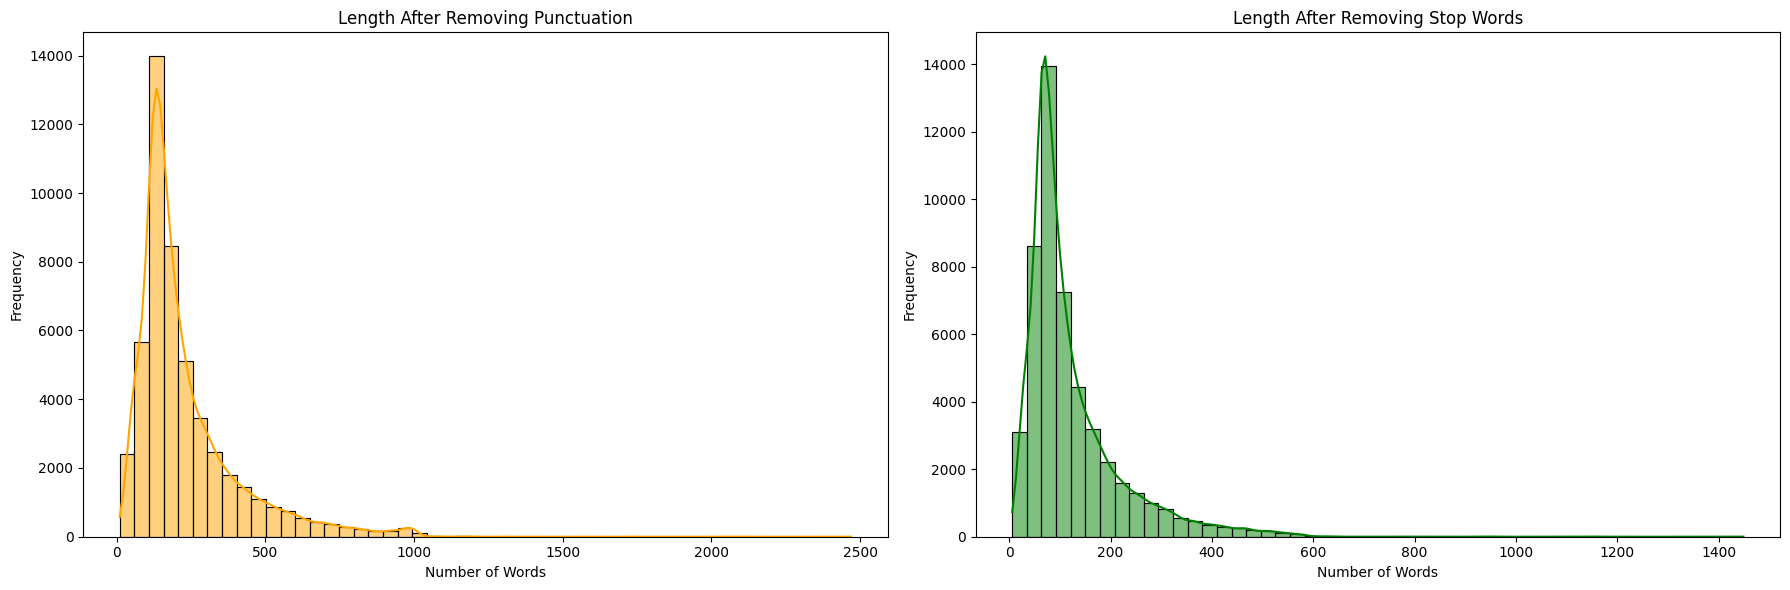

In [14]:

import matplotlib.pyplot as plt
import seaborn as sns


# Plot histograms
plt.figure(figsize=(18, 6))


plt.subplot(1, 2, 1)
sns.histplot(length_no_punct, bins=50, color='orange', kde=True)
plt.title('Length After Removing Punctuation')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(length_no_stopwords, bins=50, color='green', kde=True)
plt.title('Length After Removing Stop Words')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Findings and Observations
Removing Stopwords: Significantly reduces the length of tokenized reviews.
Impact on Statistics: Both min and max lengths are reduced, with the average length showing the most substantial decrease.
### Conclusion
The data cleaning techniques have effectively reduced the length of tokenized reviews. These steps help in making the dataset more manageable and focused and reducing coputational costs.